# Assumptions of Linear Regression

## 1] Non-linearity of the response predictor relationship

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt #(Current version of matplotlib broke heatmaps. Downgrade the package to 3.1.0)
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('archive/auto.csv')
data = data[['mpg','horsepower']]
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.dropna(inplace=True)

In [3]:
data.isnull().sum()

mpg           0
horsepower    0
dtype: int64

Text(0, 0.5, 'Horsepower')

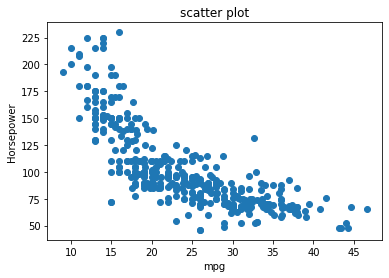

In [4]:
plt.scatter(x= data['mpg'],y=data['horsepower'])
plt.title('scatter plot')
plt.xlabel('mpg')
plt.ylabel('Horsepower')

In [5]:
formula = 'mpg ~ I(horsepower**2) + horsepower'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           5.40e-99
Time:                        16:44:29   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

In [6]:
predicted_poly = model1.predict(data['horsepower'])

In [7]:
data['predicted_poly'] = predicted_poly

In [8]:
formula = 'mpg ~ horsepower'
model2 = smf.ols(formula=formula, data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           7.03e-81
Time:                        16:44:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [9]:
predicted_simple = model2.predict(data['horsepower'])

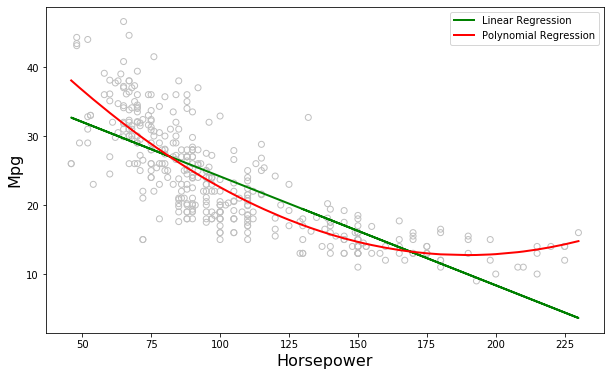

In [10]:
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(data['horsepower'],predicted_poly))
x_poly, poly_pred = zip(*sorted_zip)

sorted_zip = sorted(zip(data['mpg'],data['horsepower']))
x, y = zip(*sorted_zip)
# plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(data['horsepower'],data['mpg'], facecolors='none',color='silver')
plt.plot(data['horsepower'],predicted_simple,color='green',label='Linear Regression',linewidth=2)
plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression',linewidth=2)
plt.ylabel('Mpg',fontsize=16)
plt.xlabel('Horsepower',fontsize=16)
plt.legend()
plt.show()

In [11]:
data['predicted_simple'] = predicted_simple

In [12]:
data['res_poly'] = data['mpg'] - data['predicted_poly']

In [13]:
data['res_simple'] = data['mpg'] - data['predicted_simple']

In [14]:
data

,mpg,horsepower,predicted_poly,predicted_simple,res_poly,res_simple
0,18.0,130.0,17.091508,19.416046,0.908492,-1.416046
1,15.0,165.0,13.480156,13.891480,1.519844,1.108520
2,18.0,150.0,14.658717,16.259151,3.341283,1.740849
3,16.0,150.0,14.658717,16.259151,1.341283,-0.259151
4,17.0,140.0,15.752059,17.837598,1.247941,-0.837598
...,...,...,...,...,...,...
391,27.0,86.0,25.908837,26.361214,1.091163,0.638786
392,44.0,52.0,35.985609,31.727935,8.014391,12.272065
393,32.0,84.0,26.422834,26.676903,5.577166,5.323097
394,28.0,79.0,27.750895,27.466127,0.249105,0.533873


Text(0, 0.5, 'Residual')

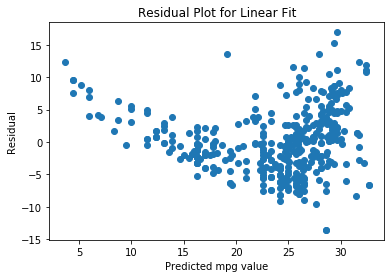

In [15]:
plt.scatter(x= data['predicted_simple'],y=data['res_simple'])
plt.title('Residual Plot for Linear Fit')
plt.xlabel('Predicted mpg value')
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

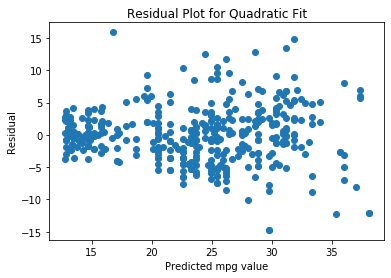

In [16]:
plt.scatter(x= data['predicted_poly'],y=data['res_poly'])
plt.title('Residual Plot for Quadratic Fit')
plt.xlabel('Predicted mpg value')
plt.ylabel('Residual')

### Non linear Transformation

In [17]:
data = pd.read_csv('archive/auto.csv')
data = data[['mpg','horsepower']]
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.dropna(inplace=True)

In [18]:
# temp = data
data['horsepower_trans'] = 1/(data['horsepower'])
formula = 'mpg ~ horsepower_trans'
model3 = smf.ols(formula=formula, data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     781.6
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           3.49e-95
Time:                        16:44:30   Log-Likelihood:                -1145.6
No. Observations:                 392   AIC:                             2295.
Df Residuals:                     390   BIC:                             2303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9355      0.734  

In [19]:
predicted_simple_transformed = model3.predict(data['horsepower_trans'])

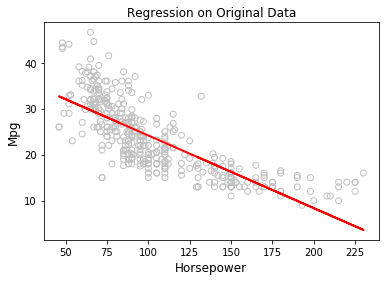

In [20]:

plt.scatter(data['horsepower'],data['mpg'], facecolors='none',color='silver')
plt.plot(data['horsepower'],predicted_simple,color='r',label='Linear Regression',linewidth=2)
# plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression',linewidth=2)
plt.title('Regression on Original Data')
plt.ylabel('Mpg',fontsize=12)
plt.xlabel('Horsepower',fontsize=12)
# plt.legend()
plt.show()

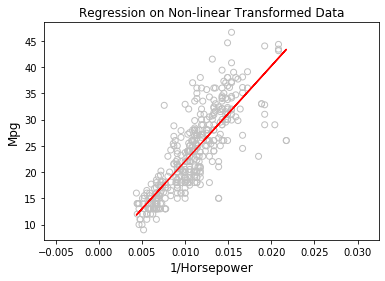

In [21]:
# plt.scatter(x= data['mpg'],y=data['horsepower_trans'])

# plt.plot(predicted_simple_transformed,data['horsepower_trans'],color='r',label='Linear Regression')

# plt.title('scatter plot')
# plt.xlabel('mgp')
# plt.ylabel('Horsepower')

plt.scatter(x=data['horsepower_trans'],y=data['mpg'],facecolors='none',color='silver')
plt.plot(data['horsepower_trans'],predicted_simple_transformed,color='r',label='Linear Regression')

plt.title('Regression on Non-linear Transformed Data')
plt.xlabel('1/Horsepower',fontsize=12)
plt.ylabel('Mpg',fontsize=12)
# plt.legend()
plt.show()

In [22]:
data['predicted_simple_transformed'] = predicted_simple_transformed
data['res_simple_transformed'] = data['mpg'] - data['predicted_simple_transformed']

Text(0, 0.5, 'Residual')

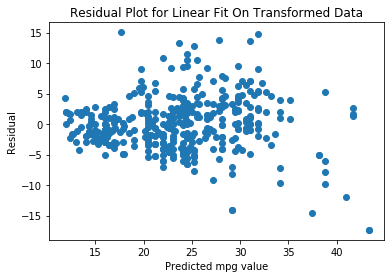

In [23]:
plt.scatter(x= data['predicted_simple_transformed'],y=data['res_simple_transformed'])
plt.title('Residual Plot for Linear Fit On Transformed Data')
plt.xlabel('Predicted mpg value')
plt.ylabel('Residual')

## 2] Heteroscedasticity

In [24]:
data = pd.read_csv('House Price.csv')
data = data[['GrLivArea','SalePrice']]

In [25]:
# GrLivArea: Above grade (ground) living area square feet

Text(0.5, 0, 'Ground Living Area')

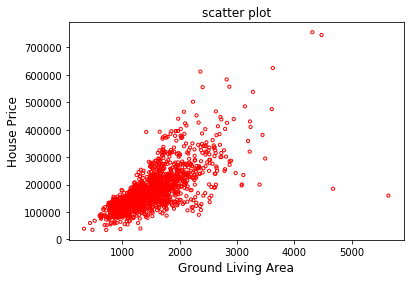

In [26]:
plt.scatter(x= data['GrLivArea'],y=data['SalePrice'],facecolors='none',color='r',s=10)
plt.title('scatter plot')
plt.ylabel('House Price',fontsize=12)
plt.xlabel('Ground Living Area',fontsize=12)

In [27]:
formula = 'SalePrice ~ GrLivArea'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          4.52e-223
Time:                        16:44:32   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

In [28]:
predicted = model1.predict(data['GrLivArea'])

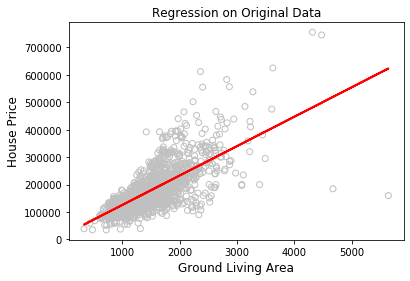

In [29]:

plt.scatter(data['GrLivArea'],data['SalePrice'], facecolors='none',color='silver')
plt.plot(data['GrLivArea'],predicted,color='r',label='Linear Regression',linewidth=2)
# plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression',linewidth=2)
plt.title('Regression on Original Data')
plt.ylabel('House Price',fontsize=12)
plt.xlabel('Ground Living Area',fontsize=12)
# plt.legend()
plt.show()

In [30]:
data['predicted_simple'] = predicted
data['residual_simple'] = data['SalePrice'] - data['predicted_simple']

Text(0, 0.5, 'Residual')

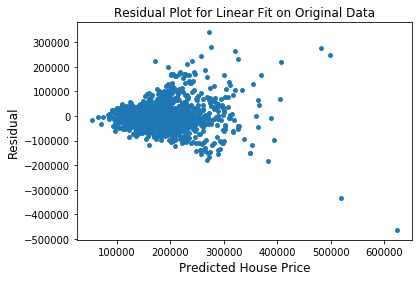

In [31]:
plt.scatter(x= data['predicted_simple'],y=data['residual_simple'],s=15)
plt.title('Residual Plot for Linear Fit on Original Data')
plt.xlabel('Predicted House Price',fontsize=12)
plt.ylabel('Residual',fontsize=12)

In [32]:
data = pd.read_csv('House Price.csv')
data = data[['GrLivArea','SalePrice']]

In [33]:
data['SalePrice'] = np.log(data['SalePrice'])

Text(0.5, 0, 'Ground Living Area')

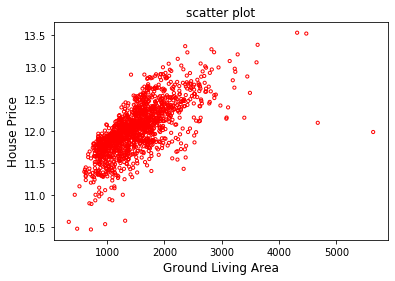

In [34]:
plt.scatter(x= data['GrLivArea'],y=data['SalePrice'],facecolors='none',color='r',s=10)
plt.title('scatter plot')
plt.ylabel('House Price',fontsize=12)
plt.xlabel('Ground Living Area',fontsize=12)

In [35]:
formula = 'SalePrice ~ GrLivArea'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1408.
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          3.06e-216
Time:                        16:44:33   Log-Likelihood:                -237.96
No. Observations:                1460   AIC:                             479.9
Df Residuals:                    1458   BIC:                             490.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2166      0.023    492.511      0.0

In [36]:
predicted = model1.predict(data['GrLivArea'])

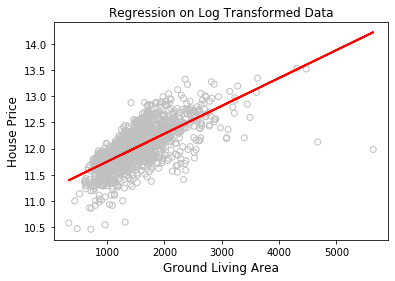

In [37]:

plt.scatter(data['GrLivArea'],data['SalePrice'], facecolors='none',color='silver')
plt.plot(data['GrLivArea'],predicted,color='r',label='Linear Regression',linewidth=2)
# plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression',linewidth=2)
plt.title('Regression on Log Transformed Data')
plt.ylabel('House Price',fontsize=12)
plt.xlabel('Ground Living Area',fontsize=12)

# plt.legend()
plt.show()

In [38]:
data['predicted_simple'] = predicted
data['residual_simple'] = data['SalePrice'] - data['predicted_simple']

Text(0, 0.5, 'Residual')

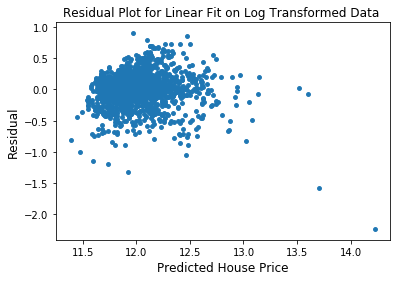

In [39]:
plt.scatter(x= data['predicted_simple'],y=data['residual_simple'],s=15)
plt.title('Residual Plot for Linear Fit on Log Transformed Data ')
plt.xlabel('Predicted House Price',fontsize=12)
plt.ylabel('Residual',fontsize=12)


## 3] Outliers

In [40]:
x = 10 * np.random.randn(50, 1)
x1 = x.reshape(-1, 1) 
y = x +  2* np.random.randn(50, 1)

Text(0.5, 1.0, 'Non Linear Data')

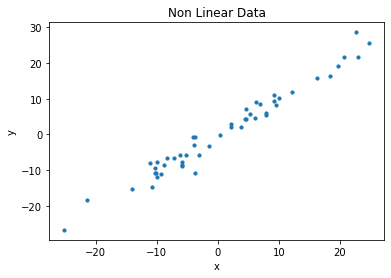

In [41]:
plt.scatter(x, y, s = 10) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Non Linear Data') 

In [42]:
data = np.concatenate((x, y), axis=1)

In [43]:
data = pd.DataFrame(data,columns=['x','y'])

In [44]:
data.to_csv('dummy_outlier_data1.csv',index=False)

In [45]:
data = pd.read_csv('dummy_outlier_data.csv')
data.head()

,x,y
0,-9.457565,-10.712020
1,-2.925383,-5.831388
2,-7.964944,-9.835522
3,-8.503204,-10.314648
4,8.733081,11.252409


Text(0.5, 1.0, 'Non Linear Data')

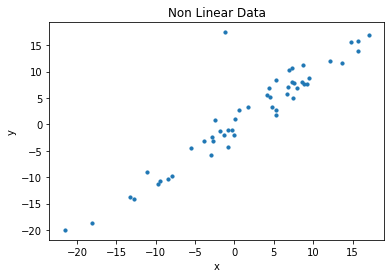

In [46]:
plt.scatter(data['x'], data['y'], s = 10) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Non Linear Data') 

In [47]:
formula = 'y ~ x'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())
predicted1 = model1.predict(data['x'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     362.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           2.69e-24
Time:                        16:44:34   Log-Likelihood:                -130.78
No. Observations:                  51   AIC:                             265.6
Df Residuals:                      49   BIC:                             269.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2737      0.458      0.598      0.5

In [48]:
RSS = np.sum((data['y'] - predicted1)**2)
print('RSS = {0}'.format(RSS))


RSE = np.sqrt(RSS/data.shape[0])
print('RSE = {0}'.format(RSE))

RSS = 503.93228077805986
RSE = 3.1434097908633056


In [49]:
data1 = data[:-1]

In [50]:
formula = 'y ~ x'
model2 = smf.ols(formula=formula, data=data1).fit()
print(model2.summary())
predicted2 = model2.predict(data1['x'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           2.86e-35
Time:                        16:44:35   Log-Likelihood:                -99.827
No. Observations:                  50   AIC:                             203.7
Df Residuals:                      48   BIC:                             207.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1198      0.263     -0.456      0.6

In [51]:
RSS = np.sum((data1['y'] - predicted2)**2)
print('RSS = {0}'.format(RSS))


RSE = np.sqrt(RSS/data1.shape[0])
print('RSE = {0}'.format(RSE))

RSS = 158.7318661640639
RSE = 1.781751195672751


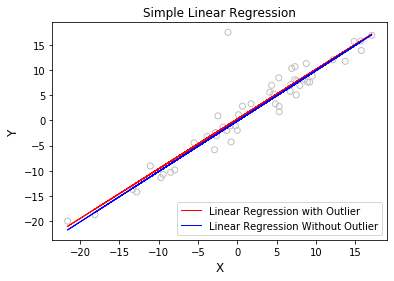

In [52]:

plt.scatter(data['x'],data['y'], facecolors='none',color='silver')
plt.plot(data['x'],predicted1,color='r',label='Linear Regression with Outlier',linewidth=1)
plt.plot(data1['x'],predicted2,color='b',label='Linear Regression Without Outlier',linewidth=1)
# plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression',linewidth=2)
plt.title('Simple Linear Regression')
plt.ylabel('Y',fontsize=12)
plt.xlabel('X',fontsize=12)
plt.legend()
plt.show()

In [53]:
data['predicted'] = predicted1 

In [54]:
data['residual'] =data['y'] - data['predicted']

Text(0, 0.5, 'Residual')

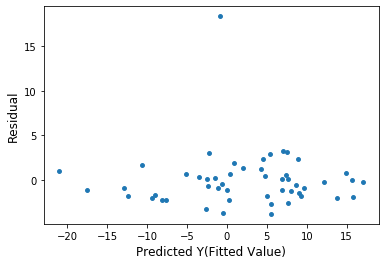

In [55]:
plt.scatter(x= data['predicted'],y=data['residual'],s=15)
# plt.title('Residual Plot for Linear Fit on Log Transformed Data ')
plt.xlabel('Predicted Y(Fitted Value)',fontsize=12)
plt.ylabel('Residual',fontsize=12)


In [56]:
stud_res = model1.outlier_test()

In [57]:
stud_res.head()

,student_resid,unadj_p,bonf(p)
0,-0.526983,0.600632,1.0
1,-1.017281,0.314120,1.0
2,-0.715055,0.478039,1.0
3,-0.699491,0.487621,1.0
4,0.746326,0.459111,1.0


Text(0, 0.5, 'Studentized Residual')

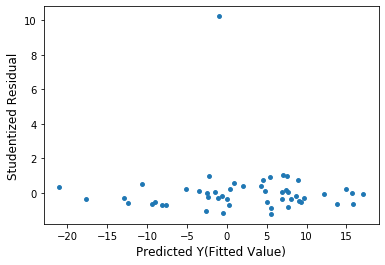

In [58]:
plt.scatter(x= data['predicted'],y=stud_res['student_resid'],s=15)
# plt.title('Residual Plot for Linear Fit on Log Transformed Data ')
plt.xlabel('Predicted Y(Fitted Value)',fontsize=12)
plt.ylabel('Studentized Residual',fontsize=12)


## 4] High leverage Points

In [59]:
data = pd.read_csv('dummy_high_leverage_data.csv')

Text(0, 0.5, 'Y')

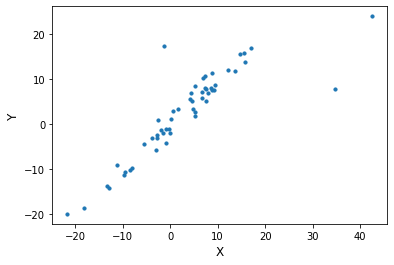

In [60]:
plt.scatter(data['x'],data['y'], s = 10) 
plt.xlabel('X',fontsize=12) 
plt.ylabel('Y',fontsize=12) 
# plt.title('Non Linear Data',fontsize=12) 

In [61]:
formula = 'y ~ x'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())
predicted1 = model1.predict(data['x'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     161.6
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           1.97e-17
Time:                        16:44:36   Log-Likelihood:                -156.44
No. Observations:                  53   AIC:                             316.9
Df Residuals:                      51   BIC:                             320.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1802      0.674      0.267      0.7

In [62]:
RSS = np.sum((data['y'] - predicted1)**2)
print('RSS = {0}'.format(RSS))

RSE = np.sqrt(RSS/data.shape[0])
print('RSE = {0}'.format(RSE))

RSS = 1136.5810701435212
RSE = 4.630866641543951


In [63]:
data1 = data[:-2]

Text(0, 0.5, 'Y')

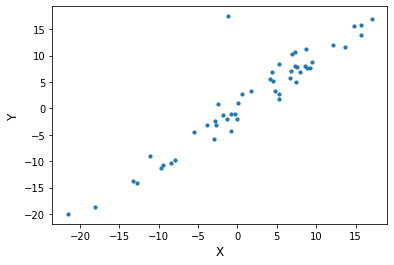

In [64]:
plt.scatter(data1['x'],data1['y'], s = 10) 
plt.xlabel('X',fontsize=12) 
plt.ylabel('Y',fontsize=12) 
# plt.title('Non Linear Data',fontsize=12) 

In [65]:
formula = 'y ~ x'
model2 = smf.ols(formula=formula, data=data1).fit()
print(model2.summary())
predicted2 = model2.predict(data1['x'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     362.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           2.69e-24
Time:                        16:44:36   Log-Likelihood:                -130.78
No. Observations:                  51   AIC:                             265.6
Df Residuals:                      49   BIC:                             269.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2737      0.458      0.598      0.5

In [66]:
RSS = np.sum((data1['y'] - predicted2)**2)
print('RSS = {0}'.format(RSS))


RSE = np.sqrt(RSS/data1.shape[0])
print('RSE = {0}'.format(RSE))

RSS = 503.93228077805986
RSE = 3.1434097908633056


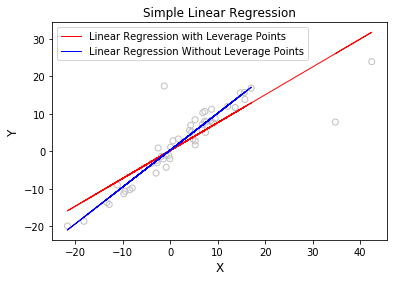

In [67]:

plt.scatter(data['x'],data['y'], facecolors='none',color='silver')
plt.plot(data['x'],predicted1,color='r',label='Linear Regression with Leverage Points',linewidth=1)
plt.plot(data1['x'],predicted2,color='b',label='Linear Regression Without Leverage Points',linewidth=1)
# plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression',linewidth=2)
plt.title('Simple Linear Regression')
plt.ylabel('Y',fontsize=12)
plt.xlabel('X',fontsize=12)
plt.legend()
plt.show()

In [68]:
data['predicted'] = predicted1

In [69]:
data['residual'] =data['y'] - data['predicted']

Text(0.5, 1.0, 'Residual Plot')

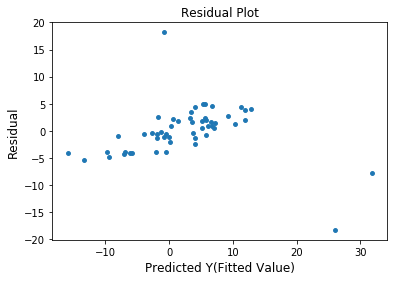

In [70]:
plt.scatter(x= data['predicted'],y=data['residual'],s=15)
# plt.title('Residual Plot for Linear Fit on Log Transformed Data ')
plt.xlabel('Predicted Y(Fitted Value)',fontsize=12)
plt.ylabel('Residual',fontsize=12)
plt.title('Residual Plot',fontsize=12)

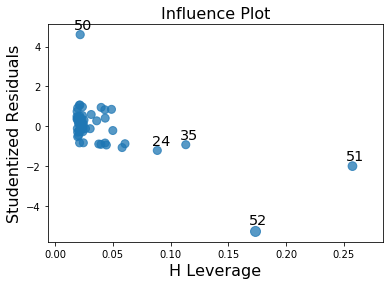

In [71]:
sm.graphics.influence_plot(model1,size=10)
plt.show()

In [72]:
# OR

   dfb_Intercept     dfb_x   cooks_d  standard_resid  hat_diag  \
0      -0.148277  0.132659  0.015687       -0.832444  0.043313   
1      -0.126600  0.062382  0.008489       -0.821733  0.024526   
2      -0.152090  0.123505  0.015272       -0.881028  0.037860   
3      -0.157017  0.132273  0.016717       -0.898749  0.039747   
4       0.112056  0.068863  0.011623        0.978394  0.023709   

   dffits_internal  student_resid    dffits  
0        -0.177125      -0.829899 -0.176584  
1        -0.130298      -0.819077 -0.129877  
2        -0.174767      -0.879063 -0.174378  
3        -0.182852      -0.897026 -0.182501  
4         0.152467       0.977976  0.152402  


Leverage vs. Studentized Residuals


C:\Users\abjid\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Studentized Residuals')

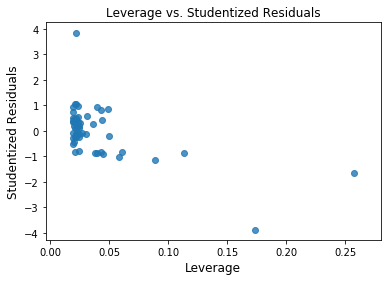

In [73]:
influence = model1.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())


student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag


print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model1.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals',fontsize=12)
plt.xlabel('Leverage',fontsize=12)
plt.ylabel('Studentized Residuals',fontsize=12)


### Plot for X1 and X2

In [74]:
x1 = 10 * np.random.randn(100, 1) 
x2 = x1 +  3* np.random.randn(100, 1)

Text(0, 0.5, 'X2')

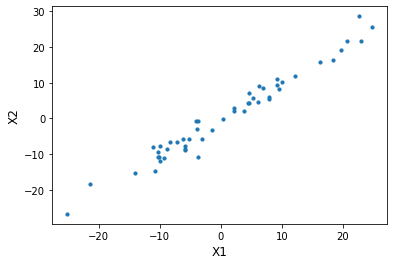

In [75]:
plt.scatter(x, y, s = 10) 
plt.xlabel('X1',fontsize=12) 
plt.ylabel('X2',fontsize=12) 
# plt.title('Non Linear Data',fontsize=12) 

In [76]:
data = np.concatenate((x1, x2), axis=1)

In [77]:
data = pd.DataFrame(data,columns=['x1','x2'])

In [78]:
data.to_csv('dummy_leverge_x1_x2_data1.csv',index=False)

In [79]:
data = pd.read_csv('dummy_leverge_x1_x2_data.csv')
data.head()

,x1,x2
0,9.275055,13.106170
1,-5.485897,0.142754
2,4.060015,7.431660
3,14.198412,21.373145
4,-2.714765,-3.403910


Text(0.5, 1.0, 'Scatter Plot of Input Features')

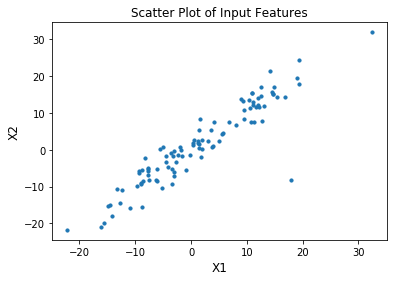

In [80]:
plt.scatter(data['x1'], data['x2'], s = 10) 
plt.xlabel('X1',fontsize=12) 
plt.ylabel('X2',fontsize=12) 
plt.title('Scatter Plot of Input Features',fontsize=12) 

## 5] Multicollinearity 


In [81]:
data = pd.read_csv('credit.csv')
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [82]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Text(0.5, 1.0, 'Scatter Plot')

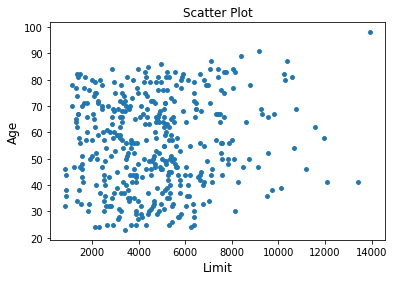

In [83]:
plt.scatter(x= data['Limit'],y=data['Age'],s=15)
# plt.title('Residual Plot for Linear Fit on Log Transformed Data ')
plt.xlabel('Limit',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.title('Scatter Plot',fontsize=12)

Text(0.5, 1.0, 'Scatter Plot')

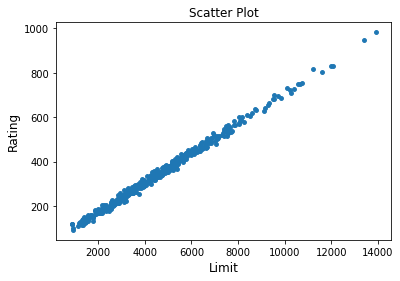

In [84]:
plt.scatter(x= data['Limit'],y=data['Rating'],s=15)
# plt.title('Residual Plot for Linear Fit on Log Transformed Data ')
plt.xlabel('Limit',fontsize=12)
plt.ylabel('Rating',fontsize=12)
plt.title('Scatter Plot',fontsize=12)

### Model 1

In [85]:
formula = 'Balance ~ Age + Limit'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          3.52e-120
Time:                        16:44:39   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.0

### Model 2

In [86]:
formula = 'Balance ~ Rating + Limit'
model2 = smf.ols(formula=formula, data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          7.57e-119
Time:                        16:44:39   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.0

In [87]:
formula = 'Balance ~ Rating + Limit + Age'
model3 = smf.ols(formula=formula, data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     403.7
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          4.84e-120
Time:                        16:44:39   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     396   BIC:                             5502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.5175     55.882     -4.644      0.0

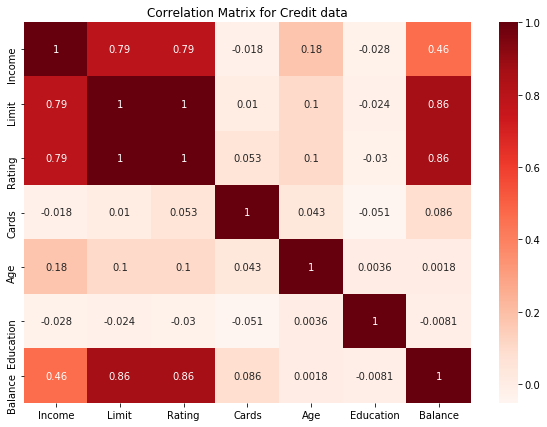

In [88]:
plt.subplots(figsize=(10,7))
plt.rcParams.update({'font.size': 10})
plt.title('Correlation Matrix for Credit data',fontsize=12)
sns.heatmap(data.corr(),  cmap='Reds',annot=True,cbar=True)

In [89]:
data.columns


Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data[['Limit', 'Rating', 'Cards', 'Age', 'Education']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

     feature          VIF
0      Limit  1027.030251
1     Rating  1217.665383
2      Cards     8.032652
3        Age     9.458063
4  Education    10.436721


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data[['Rating', 'Cards', 'Age', 'Education']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0     Rating  5.708869
1      Cards  5.026403
2        Age  9.086778
3  Education  9.603091
